In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Activation Functions
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

In [74]:
# The layer class
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev
    
    def printWeights(self):
        print(self.W)

In [137]:
# Read the data set and prepare input data and output data
targetValueMap = {
        'setosa': [1, 0, 0],
        'versicolor': [0, 1, 0],
        'virginica': [0, 0, 1]
} 

data = pd.read_csv("iris.csv")

training_set = data
# training_set = data.sample(n = 10)
test_set = data.sample(n = 10)


def get_input(df):
    temp = df.filter(items=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    temp['sepal_length'] = normalize_column(temp['sepal_length'])
    temp['sepal_width'] = normalize_column(temp['sepal_width'])
    temp['petal_length'] = normalize_column(temp['petal_length'])
    temp['petal_width'] = normalize_column(temp['petal_width'])
    return np.array(temp).T

def normalize_column(column):
    col_n=((column-column.min())/(column.max()-column.min()))
    return col_n

def get_output(df):
    output = []
    target = df["species"].to_numpy()
    for i in target:
        output.append(targetValueMap.get(i))
    
    return np.array(output).T

    
x_train = get_input(training_set)
y_train = get_output(training_set)

print(x_train.shape[1])
print('---------------------------')
print(y_train.shape[1])

x_test = get_input(test_set)
y_test = get_output(test_set)

150
---------------------------
150


In [138]:
# Start training the neural network.

m = x_train.shape[1]
epochs = 5000

layers = [Layer(4, 5, 'sigmoid'), Layer(5, 8, 'sigmoid'), Layer(8, 3, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

In [139]:
# Print Weights
# for layer in layers:
#     layer.printWeights()
#     print('-----------------------')

# print(x_test)
print('---------------------------')
print(y_test.T)

---------------------------
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]]


In [140]:
# Making predictions
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
A = x_test
for layer in layers:
    A = layer.feedforward(A)
    
print(A.T)
    

[[0.0000 0.0093 0.9955]
 [0.0000 0.0030 0.9989]
 [0.0000 0.0093 0.9954]
 [0.0000 0.0034 0.9986]
 [0.9954 0.0072 0.0001]
 [0.9954 0.0072 0.0001]
 [0.9948 0.0080 0.0001]
 [0.9959 0.0063 0.0001]
 [0.0000 0.0037 0.9985]
 [0.0000 0.0087 0.9957]]


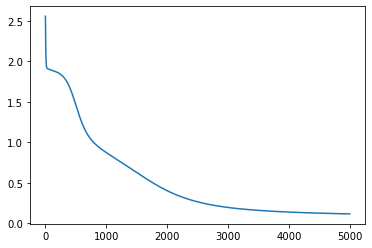

In [136]:
plt.plot(range(epochs), costs)